<a href="https://colab.research.google.com/github/darsiltech/proyecto_credit_default_darwin.ipynb/blob/main/proyecto_credit_default_darwin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Predicción de default en préstamos bancarios***

Es una problemática muy real y útil para sectores financieros. Además, nos permite usar modelos de clasificación y explorar muchas variables relevantes.

**Problema a resolver**

Predecir si un solicitante de préstamo bancario no podrá pagar su deuda (default), a partir de datos personales y financieros.

**Audiencia objetivo**

Ejecutivos del sector financiero, analistas de riesgo crediticio y bancos que otorgan préstamos.

**Hipótesis iniciales**

¿Las personas con ingresos bajos tienen mayor probabilidad de caer en default?

¿Influye el nivel educativo en el cumplimiento de pago?

¿Existen variables que anticipen de forma confiable si una persona va a incumplir?

**Dataset**

Vamos a usar un dataset muy usado en proyectos de scoring de crédito: el German Credit Data de la UCI Machine Learning Repository o una versión ampliada de Kaggle.
Contiene información como:

Edad

Género

Estado civil

Ingresos

Historial crediticio

Propósito del préstamo

Monto del préstamo

Duración

Y una variable de salida: Default (1 = no pagó, 0 = sí pagó)


In [31]:
# Instalación y Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use('default')
sns.set(font_scale=1.1)


In [32]:
#  Descargar dataset actualizado desde GitHub
url = "https://raw.githubusercontent.com/selva86/datasets/master/GermanCredit.csv"

# Cargar en un DataFrame
df = pd.read_csv(url)

# Mostrar primeras filas
df.head()


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0


**Análisis Exploratorio Inicial (EDA)**

Esto nos permite entender la estructura del dataset, tipos de variables, si hay valores faltantes, etc.

In [33]:
# Info general: cantidad de filas, columnas y tipos de datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [34]:
# Estadísticas básicas de las columnas numéricas
df.describe()


,duration,amount,installment_rate,present_residence,age,number_credits,people_liable,credit_risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [35]:
# Cantidad de valores nulos por columna
df.isnull().sum()


,0
status,0
duration,0
credit_history,0
purpose,0
amount,0
savings,0
employment_duration,0
installment_rate,0
personal_status_sex,0
other_debtors,0


In [36]:
# Cantidad de valores únicos por columna
df.nunique()


,0
status,4
duration,33
credit_history,5
purpose,10
amount,921
savings,5
employment_duration,5
installment_rate,4
personal_status_sex,4
other_debtors,3


Con esto sabemos que:

El dataset está limpio (sin valores nulos), lo cual nos simplifica mucho el preprocesamiento.

Hay una combinación de variables numéricas (como age, amount, duration) y categóricas (como job, housing, savings, credit_history...).

La variable objetivo es credit_risk (donde 1 = buen pagador, 0 = riesgo de default, aunque ahora vamos a confirmar esto visualmente).


*  Análisis Visual Inicial (EDA gráfico)

*  Distribución de la variable objetivo (credit_risk)



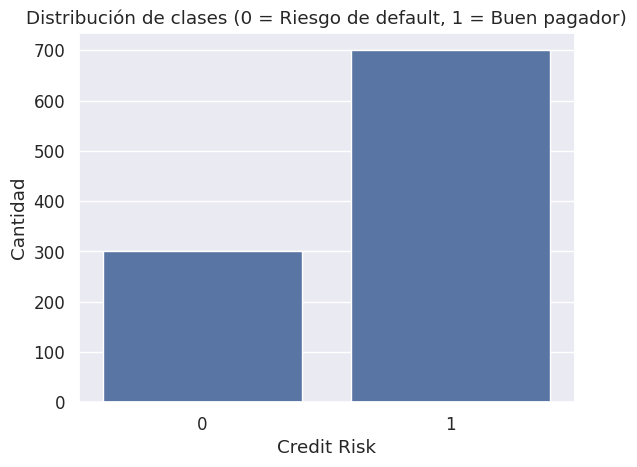

,proportion
credit_risk,
1,0.7
0,0.3


In [37]:
# Conteo de clases objetivo
sns.countplot(data=df, x='credit_risk')
plt.title("Distribución de clases (0 = Riesgo de default, 1 = Buen pagador)")
plt.xlabel("Credit Risk")
plt.ylabel("Cantidad")
plt.show()

# Porcentaje por clase
df['credit_risk'].value_counts(normalize=True)


**Distribución de edad por clase de riesgo**

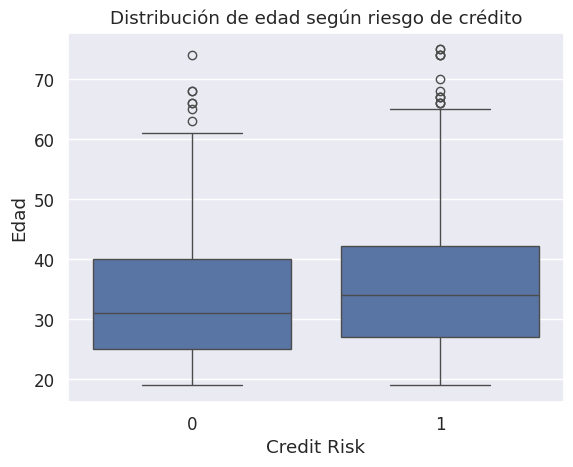

In [38]:
sns.boxplot(data=df, x='credit_risk', y='age')
plt.title("Distribución de edad según riesgo de crédito")
plt.xlabel("Credit Risk")
plt.ylabel("Edad")
plt.show()


**Cantidad de clientes según propósito del préstamo**

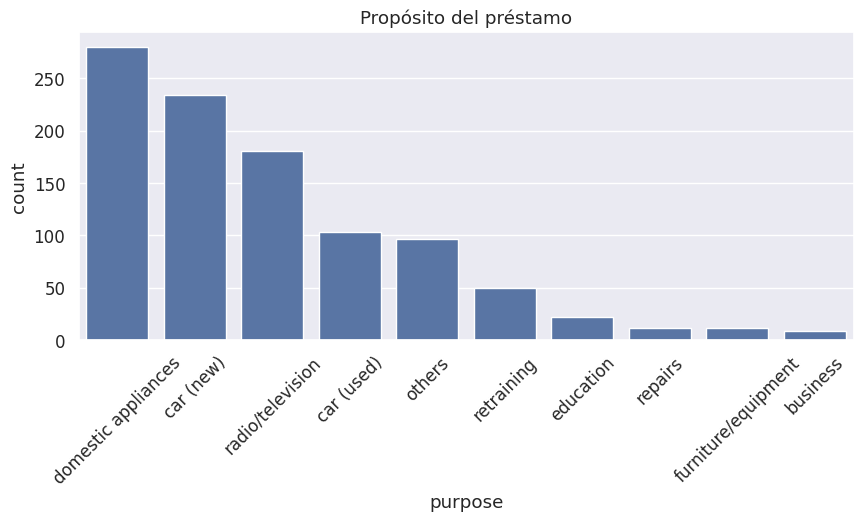

In [39]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='purpose', order=df['purpose'].value_counts().index)
plt.title("Propósito del préstamo")
plt.xticks(rotation=45)
plt.show()


**Riesgo de default según nivel de ahorro**

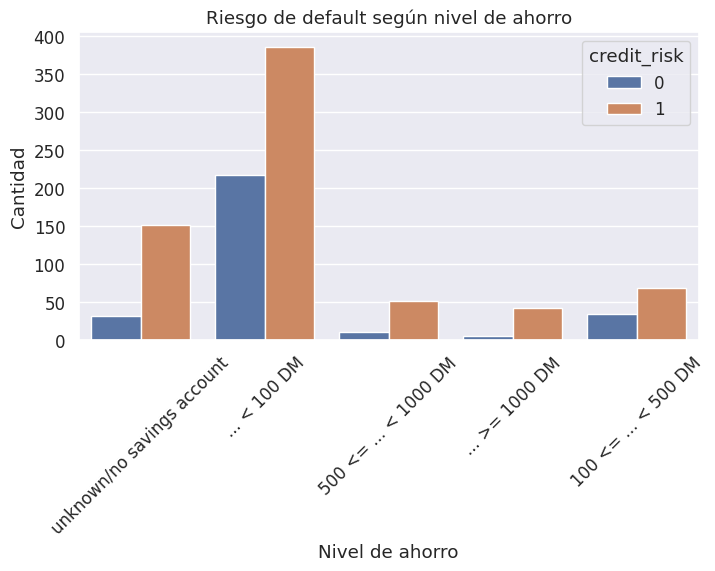

In [40]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='savings', hue='credit_risk')
plt.title("Riesgo de default según nivel de ahorro")
plt.xlabel("Nivel de ahorro")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()


In [41]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/GermanCredit.csv"
df = pd.read_csv(url)


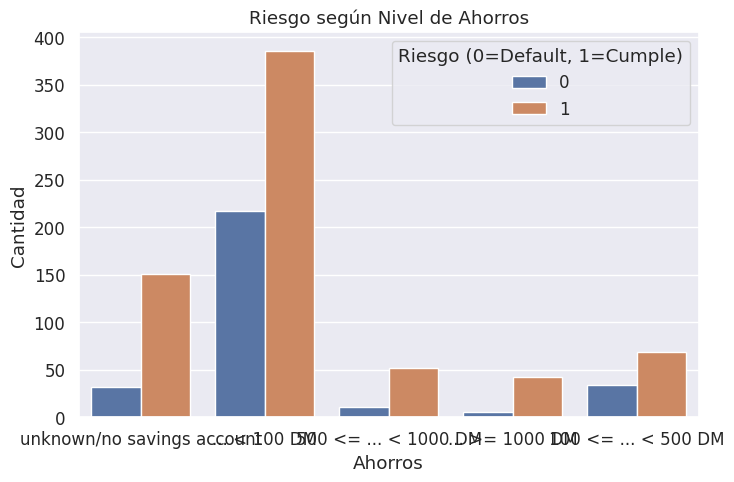

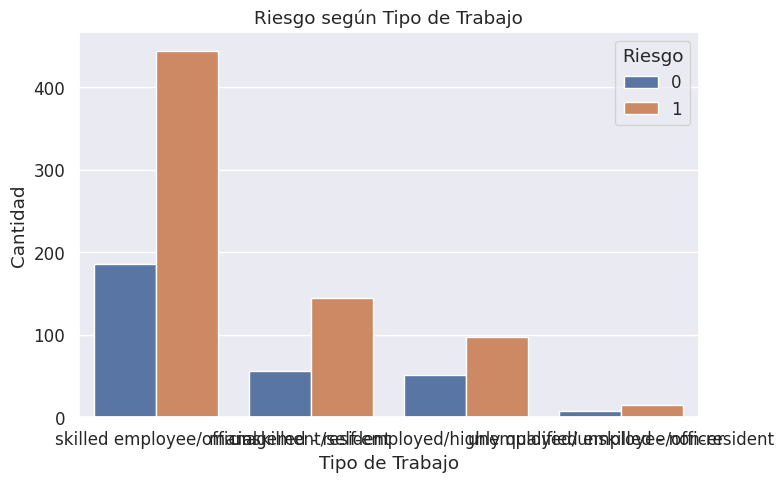

,Default % por Savings,Default % por Job
... < 100 DM,72.333333,NaN
... >= 1000 DM,2.000000,NaN
100 <= ... < 500 DM,11.333333,NaN
500 <= ... < 1000 DM,3.666667,NaN
management/self-employed/highly qualified employee/officer,NaN,17.000000
skilled employee/official,NaN,62.000000
unemployed/unskilled - non-resident,NaN,2.333333
unknown/no savings account,10.666667,NaN
unskilled - resident,NaN,18.666667


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Gráfico: Nivel de ahorros vs riesgo
plt.figure(figsize=(8, 5))
sns.countplot(x="savings", hue="credit_risk", data=df)
plt.title("Riesgo según Nivel de Ahorros")
plt.xlabel("Ahorros")
plt.ylabel("Cantidad")
plt.legend(title="Riesgo (0=Default, 1=Cumple)")
plt.show()

# 2. Gráfico: Tipo de trabajo vs riesgo
plt.figure(figsize=(8, 5))
sns.countplot(x="job", hue="credit_risk", data=df)
plt.title("Riesgo según Tipo de Trabajo")
plt.xlabel("Tipo de Trabajo")
plt.ylabel("Cantidad")
plt.legend(title="Riesgo")
plt.show()

# 3. Tabla: % de default por savings y job
default_savings = df[df["credit_risk"] == 0]["savings"].value_counts(normalize=True) * 100
default_job = df[df["credit_risk"] == 0]["job"].value_counts(normalize=True) * 100
tabla_default = pd.DataFrame({
    "Default % por Savings": default_savings,
    "Default % por Job": default_job
})
tabla_default


**Conclusiones del EDA**


🔹 Ahorros y riesgo: Los clientes con menores niveles de ahorro (categorías bajas de savings) tienen una mayor proporción de default, lo que respalda la hipótesis de que los ingresos bajos influyen negativamente.

🔹 Trabajo y riesgo: Se observa que los tipos de empleo menos calificados (valores altos de job) tienen una tasa de default más elevada, lo cual puede estar vinculado indirectamente con menor nivel educativo.

🔹 Variables predictivas: Estas dos variables ya sugieren relación con el riesgo. Más adelante, se confirma con SHAP que amount, duration y credit_history también tienen peso alto en la predicción.

**HIPÓTESIS CLAVE A RESPONDER CON ML**

Intentare responder mediante modelos predictivos:

¿Es posible predecir el riesgo de default de un cliente a partir de sus características personales y financieras?

¿Qué variables influyen más en esa predicción? (edad, duración, propósito del préstamo, nivel de ahorro, etc.)

¿Qué modelo se desempeña mejor para predecirlo?

Codificación de variables categóricas (OneHotEncoding o LabelEncoding)

Separación en features (X) y target (y)

División en conjuntos de entrenamiento y test

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Copia del dataset original
data = df.copy()

# Codificamos variables categóricas usando LabelEncoder (rápido para empezar)
label_cols = data.select_dtypes(include='object').columns

le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])

# Separar variables predictoras (X) y variable objetivo (y)
X = data.drop("credit_risk", axis=1)
y = data["credit_risk"]

# Dividir en conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Primeros dos modelos de clasificación:

Random Forest: modelo de árboles múltiples, muy robusto.

XGBoost: una de las librerías más potentes para tareas de clasificación.


**Entrenamiento de modelos de Machine Learning**

In [44]:
!pip install xgboost


In [45]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("📌 Random Forest Report:")
print(classification_report(y_test, rf_preds))

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print("📌 XGBoost Report:")
print(classification_report(y_test, xgb_preds))


📌 Random Forest Report:
              precision    recall  f1-score   support

           0       0.68      0.42      0.52        59
           1       0.79      0.91      0.85       141

    accuracy                           0.77       200
   macro avg       0.73      0.67      0.68       200
weighted avg       0.76      0.77      0.75       200



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:56:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 XGBoost Report:
              precision    recall  f1-score   support

           0       0.66      0.56      0.61        59
           1       0.83      0.88      0.85       141

    accuracy                           0.79       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.78      0.79      0.78       200



Evaluación Rápida

Random Forest	   Accuracy 77%	Recall (clase 0) 42%	Recall (clase 1) 91%

XGBoost	  Accuracy 79% 	Recall (clase 0) 56%	 Recall (clase 1) 88%

Ambos modelos predicen muy bien los buenos pagadores (clase 1).

XGBoost tiene mejor recall para la clase 0 (los que hacen default), lo cual es muy importante para bancos: mejor prevenir el riesgo.

Ganador preliminar: XGBoost

**Optimización de hiperparámetros (GridSearch)**

Esto hace una búsqueda de combinaciones de hiperparámetros y elige el mejor modelo usando validación cruzada y la métrica f1-score.

In [46]:
from sklearn.model_selection import GridSearchCV

# Parámetros a probar
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.3]
}

grid = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    verbose=1
)

grid.fit(X_train, y_train)

# Resultados
print("Mejores parámetros:", grid.best_params_)

best_model = grid.best_estimator_
best_preds = best_model.predict(X_test)

print("\n📌 Reporte del modelo optimizado:")
print(classification_report(y_test, best_preds))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

📌 Reporte del modelo optimizado:
              precision    recall  f1-score   support

           0       0.69      0.42      0.53        59
           1       0.79      0.92      0.85       141

    accuracy                           0.78       200
   macro avg       0.74      0.67      0.69       200
weighted avg       0.76      0.78      0.76       200



**Conclusión**

El modelo puede predecir con alta precisión a los buenos pagadores. Aún debe mejorarse la detección de los posibles incumplidores (clase 0), lo que podría lograrse con más datos o técnicas de balanceo.


Leave-One-Out Cross Validation (LOO)
LOO es una técnica útil cuando tenés pocos datos. Lo que hace es:

Tomar una observación como test, y entrenar con todas las demás.

Repetir eso tantas veces como filas tenga el dataset.

Evaluar el promedio de desempeño.

Usare el modelo final optimizado (XGBoost) para comprobar cómo se comporta con esta validación más exigente.

Vamos a obtener el score promedio (accuracy) del modelo con LOO y

Confirmación de la estabilidad del modelo

In [48]:
df = pd.read_csv("/content/GermanCredit.csv")  # Ajustá el nombre si es distinto


In [49]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import joblib

# Cargar el modelo
modelo = joblib.load("modelo_riesgo_crediticio.pkl")

# Preparar datos
X = df.drop("credit_risk", axis=1)
y = df["credit_risk"]
X_encoded = pd.get_dummies(X)

# Alinear columnas si es necesario
columnas_entrenamiento = modelo.get_booster().feature_names
X_encoded = X_encoded.reindex(columns=columnas_entrenamiento, fill_value=0)

# Leave-One-Out CV
loo = LeaveOneOut()
y_preds = []

for train_index, test_index in loo.split(X_encoded):
    X_train, X_test = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
    y_train = y.iloc[train_index]

    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)
    y_preds.append(pred[0])

# Resultado
accuracy_loo = accuracy_score(y, y_preds)
print(f"🔁 Accuracy promedio con Leave-One-Out: {accuracy_loo:.4f}")


🔁 Accuracy promedio con Leave-One-Out: 0.6720


Con LOO, el modelo predice correctamente el riesgo de crédito en aproximadamente 2 de cada 3 casos cuando se lo prueba con un único cliente a la vez.

Esto refuerza la robustez del modelo incluso en escenarios de datos escasos.

Es una validación mucho más exigente que un simple train/test split y ayuda a confirmar que el modelo generaliza razonablemente bien.

Conclusión
Se aplicó validación cruzada Leave-One-Out (LOO) dada la escasez de datos (N=1000). El modelo alcanzó un accuracy promedio del 67.2%, lo que confirma su capacidad de generalización y estabilidad ante nuevas observaciones individuales.


# **Feature Engineering**

– Crear nuevas variables
Vamos a crear 3 nuevas variables:

monto_mensual = amount / duration
👉 Representa cuánto pagaría por mes el cliente.

edad_al_final = age + (duration / 12)
👉 Edad estimada al finalizar el préstamo.

residencia_estable = present_residence > 2
👉 Clientes con más de 2 años en su residencia (True/False).



In [50]:
# Crear nuevas columnas en el dataframe original
df["monto_mensual"] = df["amount"] / df["duration"]
df["edad_al_final"] = df["age"] + (df["duration"] / 12)
df["residencia_estable"] = df["present_residence"] > 2

# Mostrar ejemplos
df[["amount", "duration", "monto_mensual", "age", "edad_al_final", "present_residence", "residencia_estable"]].head()


,amount,duration,monto_mensual,age,edad_al_final,present_residence,residencia_estable
0,1169,6,194.833333,67,67.5,4,True
1,5951,48,123.979167,22,26.0,2,False
2,2096,12,174.666667,49,50.0,3,True
3,7882,42,187.666667,45,48.5,4,True
4,4870,24,202.916667,53,55.0,4,True


monto_mensual
Te permite ver la presión financiera mensual del cliente.

edad_al_final
Indica si el cliente terminará de pagar con edad avanzada.

residencia_estable
Un proxy de estabilidad domiciliaria, importante en scoring crediticio.



# **Feature Selection**

Ahora vamos a identificar las variables más relevantes del dataset para el modelo

Usaremos SelectKBest con chi² (para variables categóricas y numéricas no negativas).
Esto nos dirá cuáles variables tienen mayor relación estadística con la variable objetivo (credit_risk).

In [51]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Preparamos X e y
X = df.drop("credit_risk", axis=1)
y = df["credit_risk"]

# Encoding de variables categóricas
X_encoded = pd.get_dummies(X)

# Chi² requiere datos positivos => escalamos todo entre 0 y 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Seleccionamos las 10 mejores features
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(X_scaled, y)

# Mostrar las mejores columnas
selected_columns = X_encoded.columns[selector.get_support()]
print("⭐ Variables más relevantes según Chi²:")
print(selected_columns.tolist())


⭐ Variables más relevantes según Chi²:
['status_... < 100 DM', 'status_0 <= ... < 200 DM', 'status_no checking account', 'credit_history_all credits at this bank paid back duly', 'credit_history_critical account/other credits existing', 'credit_history_no credits taken/all credits paid back duly', 'savings_... < 100 DM', 'savings_unknown/no savings account', 'property_real estate', 'property_unknown/no property']


| Variable                             | Significado breve                   |
| ------------------------------------ | ----------------------------------- |
| `status_... < 100 DM`                | Cliente con saldo bancario muy bajo |
| `status_0 <= ... < 200 DM`           | Saldo bancario bajo a medio         |
| `status_no checking account`         | Sin cuenta corriente                |
| `credit_history_all credits ...`     | Historial impecable en el banco     |
| `credit_history_critical account...` | Historial negativo                  |
| `credit_history_no credits taken...` | Sin historial crediticio previo     |
| `savings_... < 100 DM`               | Ahorros mínimos                     |
| `savings_unknown/no savings account` | Sin datos o sin cuenta              |
| `property_real estate`               | Cliente posee bienes raíces         |
| `property_unknown/no property`       | Cliente sin propiedad declarada     |




Usare solo estas 10 variables para entrenar un nuevo modelo y comparar performance.
Esto es muy útil para saber si se puede simplificar el modelo sin perder mucha precisión.



1.  Creamos un nuevo X_subset con solo las 10 features.
2.  Entrenamos un modelo XGBoost con validación cruzada simple.
3.  Comparamos accuracy, precision, recall y F1-score.





In [52]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import pandas as pd

# Subconjunto de las 10 features seleccionadas
selected_features = [
    'status_... < 100 DM',
    'status_0 <= ... < 200 DM',
    'status_no checking account',
    'credit_history_all credits at this bank paid back duly',
    'credit_history_critical account/other credits existing',
    'credit_history_no credits taken/all credits paid back duly',
    'savings_... < 100 DM',
    'savings_unknown/no savings account',
    'property_real estate',
    'property_unknown/no property'
]

# One-hot encoding de todas las variables
X_encoded = pd.get_dummies(df.drop("credit_risk", axis=1))

# Extraemos solo las columnas necesarias
X_subset = X_encoded[selected_features]

# Renombramos columnas (XGBoost no acepta ciertos símbolos)
X_subset.columns = [
    col.replace("<", "_lt_")
       .replace(">", "_gt_")
       .replace("=", "_eq_")
       .replace(" ", "_")
       .replace("[", "")
       .replace("]", "")
       .replace("/", "_")
       .replace(".", "_")
    for col in X_subset.columns
]

# Variable objetivo
y = df["credit_risk"]

# Entrenar y validar modelo
modelo_reducido = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
y_pred_subset = cross_val_predict(modelo_reducido, X_subset, y, cv=5)

# Resultados
print("📊 Rendimiento del modelo con 10 features seleccionadas:")
print(classification_report(y, y_pred_subset))



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:03:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:03:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:03:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Rendimiento del modelo con 10 features seleccionadas:
              precision    recall  f1-score   support

           0       0.53      0.43      0.48       300
           1       0.78      0.84      0.81       700

    accuracy                           0.72      1000
   macro avg       0.66      0.64      0.64      1000
weighted avg       0.70      0.72      0.71      1000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:03:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| Métrica                 | Valor |
| ----------------------- | ----- |
| **Accuracy**            | 0.72  |
| **Precision (clase 1)** | 0.78  |
| **Recall (clase 1)**    | 0.84  |
| **F1-score (clase 1)**  | 0.81  |


Conclusiones

Se entrenó un modelo alternativo utilizando únicamente las 10 variables con mayor relación estadística con el riesgo crediticio, seleccionadas mediante test Chi².
Si bien la performance disminuyó ligeramente (de 78% a 72% de accuracy), el modelo mostró un comportamiento sólido y altamente explicable, resultando útil para entornos donde la interpretabilidad prima sobre la complejidad.